In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv('/tf-wsl/TextMiningDisney/DisneylandReviews.csv', encoding='latin1', na_values=['missing'])
df.head()

Review_ID  Rating Year_Month     Reviewer_Location  \
0  670772142       4     2019-4             Australia   
1  670682799       4     2019-5           Philippines   
2  670623270       4     2019-4  United Arab Emirates   
3  670607911       4     2019-4             Australia   
4  670607296       4     2019-4        United Kingdom   

                                         Review_Text               Branch  
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
1  Its been a while since d last time we visit HK...  Disneyland_HongKong  
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
4  the location is not in the city, took around 1...  Disneyland_HongKong

In [4]:
df.drop(columns=['Review_ID'], inplace=True)
df.head()

Rating Year_Month     Reviewer_Location  \
0       4     2019-4             Australia   
1       4     2019-5           Philippines   
2       4     2019-4  United Arab Emirates   
3       4     2019-4             Australia   
4       4     2019-4        United Kingdom   

                                         Review_Text               Branch  
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
1  Its been a while since d last time we visit HK...  Disneyland_HongKong  
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
4  the location is not in the city, took around 1...  Disneyland_HongKong

In [5]:
df['Year_Month'] = pd.to_datetime(df['Year_Month'], format='%Y-%m')

In [6]:
df = df.loc[df['Branch'] == 'Disneyland_California']
df.head()

Rating Year_Month Reviewer_Location  \
9620       5 2019-04-01     United States   
9621       5 2019-04-01     United States   
9622       4 2019-05-01         Australia   
9623       5 2019-04-01     United States   
9624       5 2019-04-01            Canada   

                                            Review_Text                 Branch  
9620  This place has always been and forever will be...  Disneyland_California  
9621  A great day of simple fun and thrills. Bring c...  Disneyland_California  
9622  All and all a great day was had. The crowds ar...  Disneyland_California  
9623  Having been to the Florida location numerous t...  Disneyland_California  
9624  Had the 4 day pass, spent 3 at DL and one at C...  Disneyland_California

In [7]:
null_counts = df.isnull().sum()

# Convert the counts to a DataFrame for tabular display
null_counts_table = pd.DataFrame(null_counts, columns=['Null Count'])

print(null_counts_table)

                   Null Count
Rating                      0
Year_Month               1204
Reviewer_Location           0
Review_Text                 0
Branch                      0


In [8]:
df.shape

(19406, 5)

In [9]:
from textblob import TextBlob

def get_sentiment(text):
    # Create a TextBlob object
    blob = TextBlob(text)
    # Return the sentiment polarity
    return blob.sentiment.polarity

df['Sentiment'] = df['Review_Text'].apply(get_sentiment)

In [10]:
import string
from collections import Counter, defaultdict
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams

stop_words = set(stopwords.words('english'))
custom_stop_words = ["california", "disneyland", "disneyworld", "park", "disney", "earth", "space", "splash", "indiana", "haunted", "n't", "'s", ".", "—"]
stop_words.update(custom_stop_words)

punctuation = set(string.punctuation)
lemmatizer = WordNetLemmatizer()

# Calculate word frequencies in a single pass
frequency = Counter(lemmatizer.lemmatize(word.lower()) for text in df['Review_Text'] for word in word_tokenize(text.lower()) if word not in stop_words and word not in punctuation and word.isalpha())

def get_tokens(text):
    tokens = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(text.lower()) if word not in stop_words and word not in punctuation and word.isalpha() and frequency[word] >= 10]
    return tokens

def get_ngrams(text, n=2):
    tokens = get_tokens(text)
    ngram_list = list(ngrams(tokens, n))
    return ngram_list

df['Tokens'] = df['Review_Text'].apply(get_tokens)
df['Bigrams'] = df['Review_Text'].apply(get_ngrams, n=2)
df['Trigrams'] = df['Review_Text'].apply(get_ngrams, n=3)
df.head()

Rating Year_Month Reviewer_Location  \
9620       5 2019-04-01     United States   
9621       5 2019-04-01     United States   
9622       4 2019-05-01         Australia   
9623       5 2019-04-01     United States   
9624       5 2019-04-01            Canada   

                                            Review_Text  \
9620  This place has always been and forever will be...   
9621  A great day of simple fun and thrills. Bring c...   
9622  All and all a great day was had. The crowds ar...   
9623  Having been to the Florida location numerous t...   
9624  Had the 4 day pass, spent 3 at DL and one at C...   

                     Branch  Sentiment  \
9620  Disneyland_California   0.311429   
9621  Disneyland_California   0.397222   
9622  Disneyland_California   0.153571   
9623  Disneyland_California   0.225694   
9624  Disneyland_California   0.340000   

                                                 Tokens  \
9620  [place, always, forever, special, feeling, get...   
9621  [great, day, simple, fun, bring, cash, nothing...   
9622  [great, day, huge, ride, sometimes, min, wait,...   
9623  [florida, location, numerous, know, one, would...   
9624  [day, pas, spent, dl, one, ca, great, place, v...   

                                                Bigrams  \
9620  [(place, always), (always, forever), (forever,...   
9621  [(great, day), (day, simple), (simple, fun), (...   
9622  [(great, day), (day, huge), (huge, ride), (rid...   
9623  [(florida, location), (location, numerous), (n...   
9624  [(day, pas), (pas, spent), (spent, dl), (dl, o...   

                                               Trigrams  
9620  [(place, always, forever), (always, forever, s...  
9621  [(great, day, simple), (day, simple, fun), (si...  
9622  [(great, day, huge), (day, huge, ride), (huge,...  
9623  [(florida, location, numerous), (location, num...  
9624  [(day, pas, spent), (pas, spent, dl), (spent, ...

In [11]:
positive = df[df['Sentiment'] > 0]
positive.head()

Rating Year_Month Reviewer_Location  \
9620       5 2019-04-01     United States   
9621       5 2019-04-01     United States   
9622       4 2019-05-01         Australia   
9623       5 2019-04-01     United States   
9624       5 2019-04-01            Canada   

                                            Review_Text  \
9620  This place has always been and forever will be...   
9621  A great day of simple fun and thrills. Bring c...   
9622  All and all a great day was had. The crowds ar...   
9623  Having been to the Florida location numerous t...   
9624  Had the 4 day pass, spent 3 at DL and one at C...   

                     Branch  Sentiment  \
9620  Disneyland_California   0.311429   
9621  Disneyland_California   0.397222   
9622  Disneyland_California   0.153571   
9623  Disneyland_California   0.225694   
9624  Disneyland_California   0.340000   

                                                 Tokens  \
9620  [place, always, forever, special, feeling, get...   
9621  [great, day, simple, fun, bring, cash, nothing...   
9622  [great, day, huge, ride, sometimes, min, wait,...   
9623  [florida, location, numerous, know, one, would...   
9624  [day, pas, spent, dl, one, ca, great, place, v...   

                                                Bigrams  \
9620  [(place, always), (always, forever), (forever,...   
9621  [(great, day), (day, simple), (simple, fun), (...   
9622  [(great, day), (day, huge), (huge, ride), (rid...   
9623  [(florida, location), (location, numerous), (n...   
9624  [(day, pas), (pas, spent), (spent, dl), (dl, o...   

                                               Trigrams  
9620  [(place, always, forever), (always, forever, s...  
9621  [(great, day, simple), (day, simple, fun), (si...  
9622  [(great, day, huge), (day, huge, ride), (huge,...  
9623  [(florida, location, numerous), (location, num...  
9624  [(day, pas, spent), (pas, spent, dl), (spent, ...

In [12]:
negative = df[df['Sentiment'] <= -0.5]
negative.head()

Rating Year_Month Reviewer_Location  \
9977        5 2019-01-01     United States   
10544       4 2018-07-01            Israel   
10800       1 2018-06-01            Canada   
16197       5 2016-02-01     United States   
16296       5 2016-01-01            Canada   

                                             Review_Text  \
9977   Although this is an EXPENSIVE amusement park a...   
10544  Been to one, been to all... Get's a bit boring...   
10800  The line ups were crazy. From security to the ...   
16197  Visited the happiest place on earth on a Thrus...   
16296  If you are in the vicinity and have kids with ...   

                      Branch  Sentiment  \
9977   Disneyland_California  -0.625000   
10544  Disneyland_California  -1.000000   
10800  Disneyland_California  -0.633333   
16197  Disneyland_California  -0.500000   
16296  Disneyland_California  -1.000000   

                                                  Tokens  \
9977   [although, expensive, amusement, per, person, ...   
10544         [one, get, bit, boring, suppose, say, got]   
10800  [line, ups, crazy, security, ticket, get, impo...   
16197      [visited, happiest, place, short, awful, lot]   
16296                             [go, wo, disappointed]   

                                                 Bigrams  \
9977   [(although, expensive), (expensive, amusement)...   
10544  [(one, get), (get, bit), (bit, boring), (borin...   
10800  [(line, ups), (ups, crazy), (crazy, security),...   
16197  [(visited, happiest), (happiest, place), (plac...   
16296                     [(go, wo), (wo, disappointed)]   

                                                Trigrams  
9977   [(although, expensive, amusement), (expensive,...  
10544  [(one, get, bit), (get, bit, boring), (bit, bo...  
10800  [(line, ups, crazy), (ups, crazy, security), (...  
16197  [(visited, happiest, place), (happiest, place,...  
16296                           [(go, wo, disappointed)]

In [21]:
from wordcloud import WordCloud


def generate_wordcloud(tokens, file_name):
    tokens = [' '.join(token) for token in tokens]
    
    # Join all tokens into a single string
    text = ' '.join(tokens)
    
    # Generate and display the word cloud
    wordcloud = WordCloud(width=800, height=400).generate(text)

    plt.figure(figsize=(15, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordcloud.to_file(file_name)


In [14]:
from collections import Counter

def generate_freq_table(tokens):
    all_words = [word for sublist in tokens for word in sublist]
    frequency_table = pd.DataFrame(Counter(all_words).items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
    
    frequency_table = frequency_table[frequency_table['Frequency'] >= 2]
    
    frequency_table

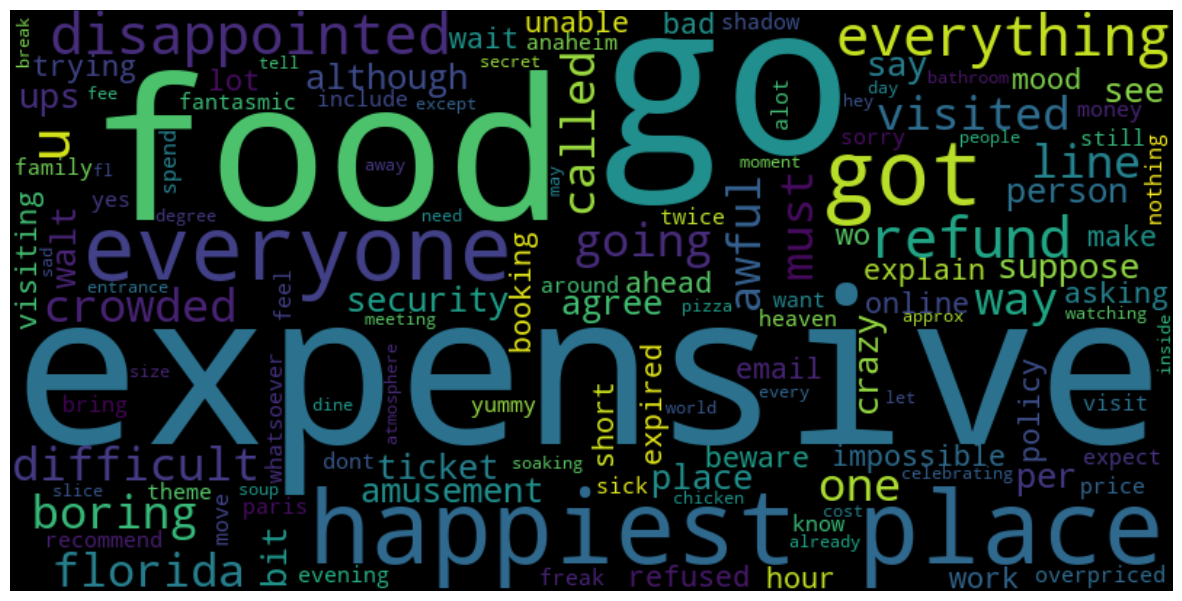

In [23]:
generate_wordcloud(negative['Tokens'], file_name='negative.png')

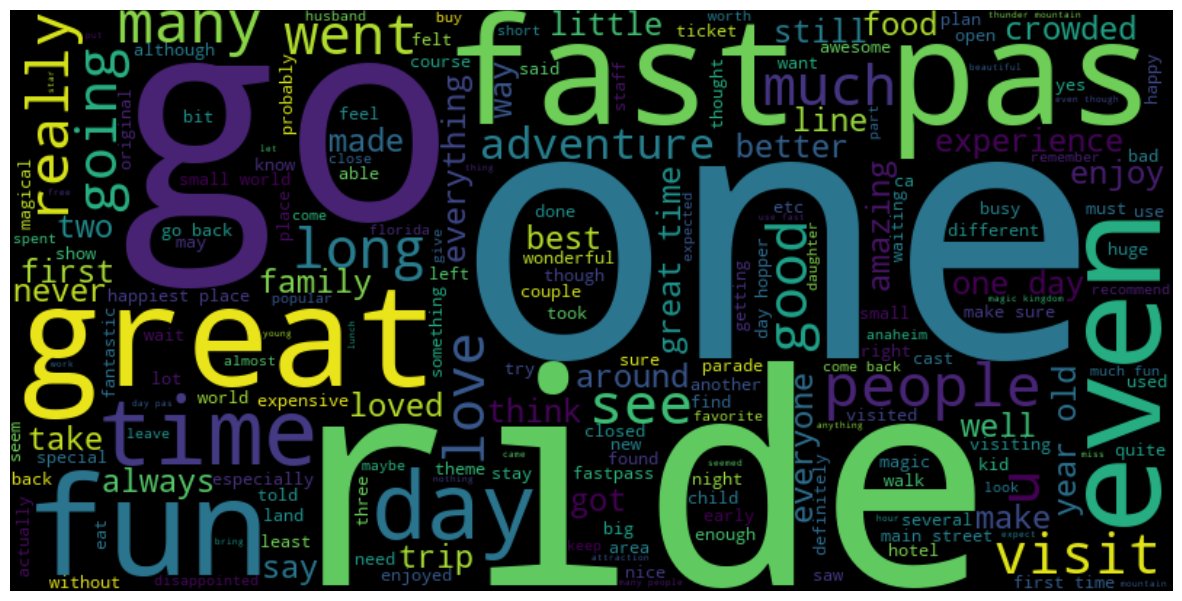

In [24]:
generate_wordcloud(positive['Tokens'], file_name='positive.png')

In [20]:
from gensim import corpora, models
import pyLDAvis
import pyLDAvis.gensim_models

class LDATrainer():
    def __init__(self, tokens, is_ngram):
        if is_ngram:
            joined_ngrams = [[' '.join(gram) for gram in doc] for doc in tokens]
            self.dictionary = corpora.Dictionary(joined_ngrams)
            self.corpus = [self.dictionary.doc2bow(text) for text in joined_ngrams]
        else:
            self.dictionary = corpora.Dictionary(tokens)
            self.corpus = [self.dictionary.doc2bow(text) for text in tokens]
        self.lda_model = None

    def train(self, n_topics):
        self.lda_model = models.LdaModel(corpus=self.corpus, 
                                        num_topics=n_topics,
                                        id2word=self.dictionary, 
                                        passes=15,
                                        alpha='auto',
                                        per_word_topics=True)

    def list_topics(self):
        for idx, topic in self.lda_model.print_topics(-1):
            print(f"Topic {idx}: {topic}")

    def visualize(self, file_name):
        #Creating Topic Distance Visualization 
        pyLDAvis.enable_notebook()
        vis = pyLDAvis.gensim_models.prepare(self.lda_model, self.corpus, self.dictionary)
        pyLDAvis.save_html(vis, f'/tf-wsl/TextMiningDisney/{file_name}.html')
        return vis

    def get_topics(self, df):
        def get_topic(text):
            bow = self.dictionary.doc2bow(text)
            topic_scores = self.lda_model.get_document_topics(bow)
            return sorted(topic_scores, key=lambda x: x[1], reverse=True)[0][0]
    
        return self.tokens.apply(get_topic)

In [27]:
negative_lda = LDATrainer(negative['Trigrams'], is_ngram=True)

negative_lda.train(n_topics=2)
negative_lda.visualize(file_name='negative-trigrams')

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.063265  0.0       1        1  59.439593
0     -0.063265  0.0       2        1  40.560407, topic_info=                         Term      Freq     Total Category  logprob  loglift
2       called happiest place  0.000000  0.000000  Default  30.0000  30.0000
64               know want go  0.000000  0.000000  Default  29.0000  29.0000
63            freak know want  0.000000  0.000000  Default  28.0000  28.0000
1        amusement per person  0.000000  0.000000  Default  27.0000  27.0000
4     expensive amusement per  0.000000  0.000000  Default  26.0000  26.0000
..                        ...       ...       ...      ...      ...      ...
59      anaheim shadow expect  0.671406  0.943242   Topic2  -4.4233   0.5624
80   fantasmic difficult move  0.671404  0.943242   Topic2  -4.4233   0.5624
124         soup also chicken  0.671401  0.943243   Topic2  -4.4233   0.5624
117          let people every  0.671399  0.943243   Topic2  -4.4233   0.5624
123           place soup also  0.671397  0.943244   Topic2  -4.4233   0.5624

[90 rows x 6 columns], token_table=      Topic      Freq                          Term
term                                               
33        1  0.962656           ahead trying asking
0         2  1.060187  although expensive amusement
1         2  1.060190          amusement per person
59        2  1.060174         anaheim shadow expect
97        1  0.962661                 approx u food
60        2  1.060180             awful paris twice
112       2  1.060175      bathroom food everything
35        1  0.962661          beware refund policy
119       2  1.060176                boring dine go
89        1  0.962657                break get away
36        1  0.962661              called email way
2         2  1.060193         called happiest place
90        1  0.962656          celebrating sad need
134       1  0.962661            cost get expensive
3         2  1.060185          everyone walt called
61        2  1.060188             expect freak know
4         2  1.060189       expensive amusement per
83        2  1.060179        expensive crowded line
99        1  0.962657         expensive slice pizza
80        2  1.060173      fantasmic difficult move
100       1  0.962659             fee moment approx
50        1  0.962662             feel sorry family
62        2  1.060181           florida awful paris
101       1  0.962662         food inside expensive
63        2  1.060190               freak know want
51        1  0.962660             get nothing spend
91        1  0.962657            go celebrating sad
122       2  1.060178                 go place soup
39        1  0.962659              got ahead trying
5         2  1.060188          happiest place agree
52        1  0.962658             include price one
102       1  0.962662        inside expensive slice
64        2  1.060192                  know want go
117       2  1.060172              let people every
40        1  0.962652              make work called
103       1  0.962663               moment approx u
6         2  1.060187             must see everyone
93        1  0.962661                need break get
54        1  0.962660           nothing spend money
56        1  0.962660        overpriced get nothing
65        2  1.060188           paris twice anaheim
7         2  1.060187               per person must
8         2  1.060187               person must see
123       2  1.060172               place soup also
41        1  0.962660         policy booking online
42        1  0.962658          refund beware refund
43        1  0.962661         refund policy booking
44        1  0.962655            refund unable make
9         2  1.060188             see everyone walt
66        2  1.060187           shadow expect freak
104       1  0.962663                 slice pizza u
124       2  1.060172             soup also c

In [30]:
positive_lda = LDATrainer(positive['Trigrams'], is_ngram=True)

positive_lda.train(n_topics=2)
positive_lda.visualize(file_name='positive-trigrams')

PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.063632  0.0       1        1  50.326016
0     -0.063632  0.0       2        1  49.673984, topic_info=                        Term        Freq       Total Category  logprob  \
17032          make sure get   80.000000   80.000000  Default  30.0000   
486     big thunder mountain  157.000000  157.000000  Default  29.0000   
3830            use fast pas  160.000000  160.000000  Default  28.0000   
21332         love love love   23.000000   23.000000  Default  27.0000   
107051         sure use fast   15.000000   15.000000  Default  26.0000   
...                      ...         ...         ...      ...      ...   
2187       year old daughter   24.917090   88.401394   Topic2  -9.6380   
1571            year old son   23.930224   76.539514   Topic2  -9.6784   
19623          every time go   19.460326   42.523807   Topic2  -9.8852   
34166         peter pan ride   18.958739   40.139272   Topic2  -9.9113   
4065           feel like kid   19.230545   46.770057   Topic2  -9.8971   

        loglift  
17032   30.0000  
486     29.0000  
3830    28.0000  
21332   27.0000  
107051  26.0000  
...         ...  
2187    -0.5666  
1571    -0.4630  
19623   -0.0820  
34166   -0.0504  
4065    -0.1891  

[191 rows x 6 columns], token_table=       Topic      Freq                  Term
term                                        
11207      1  0.482881    advantage fast pas
11207      2  0.533710    advantage fast pas
17216      1  0.870214  adventure across way
69470      1  0.094128       always fun time
69470      2  0.941282       always fun time
...      ...       ...                   ...
82466      1  0.947694          year old one
1571       1  0.692453          year old son
1571       2  0.313564          year old son
42660      1  0.854639         year old year
42660      2  0.147352         year old year

[222 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [31]:
df.to_csv('processed.csv')